# Note:
    Check Subsequnce based CPD solution.

# Import libs

In [1]:
import sys
sys.path.append("../..")

In [2]:
from data.SythData import LinearSteps, SinusoidWaves
from models.SubspaceBased import SingularSequenceTransformer


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data

In [13]:
# data = LinearSteps(length_data=1000, cps_number=5, white_noise_level="default").get()
data = SinusoidWaves(length_data=1000, cps_number=5, white_noise_level="min").get()

<Axes: xlabel='time'>

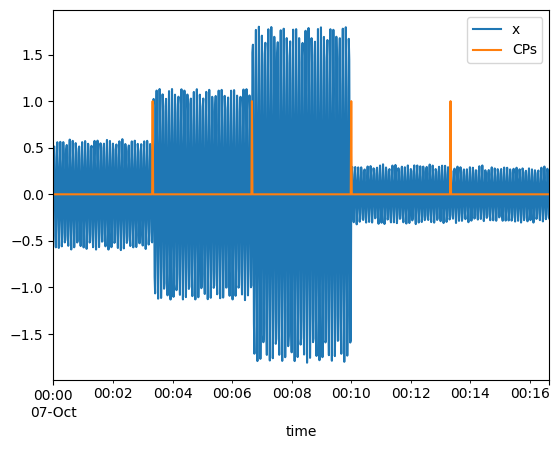

In [14]:
data.plot()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 1999-10-07 00:00:00 to 1999-10-07 00:16:39
Freq: S
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   CPs     1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.4 KB


# Init model

In [16]:
model = SingularSequenceTransformer(
                     is_z_normalization=True,
                     is_cps_filter_on=True,
                     is_squared_residual=True,
                     n_components=2,
                     threshold_std_coeff=3.7,
                     is_exp_squared=False).fit(list(data['x'].values), None)

In [17]:
distances = model.get_distances(data['x'].values)

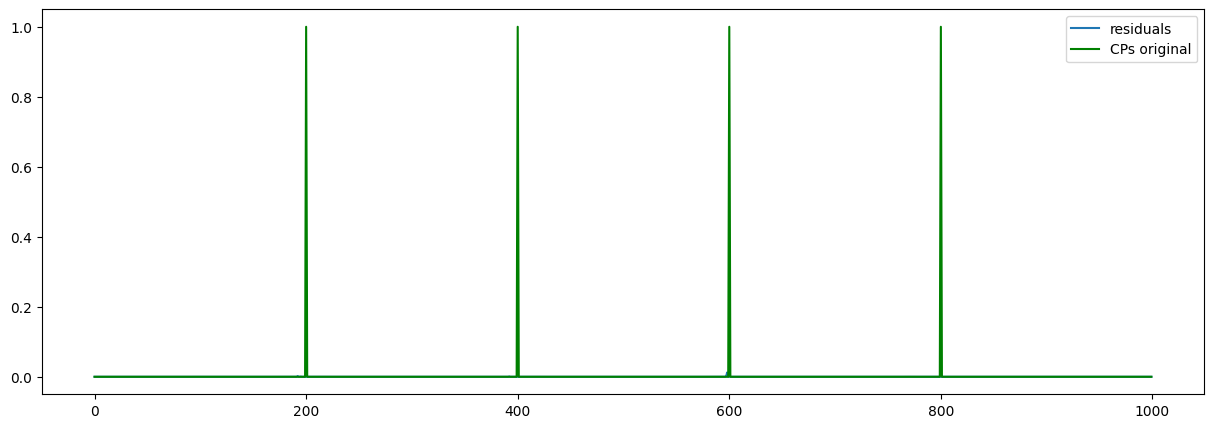

In [18]:
plt.figure(figsize=(15,5))
plt.plot(distances**2, label='residuals')
plt.plot(data['CPs'].values, label='CPs original', color='green')
plt.legend()

In [19]:
cps_pred = model.predict(data['x'].values)

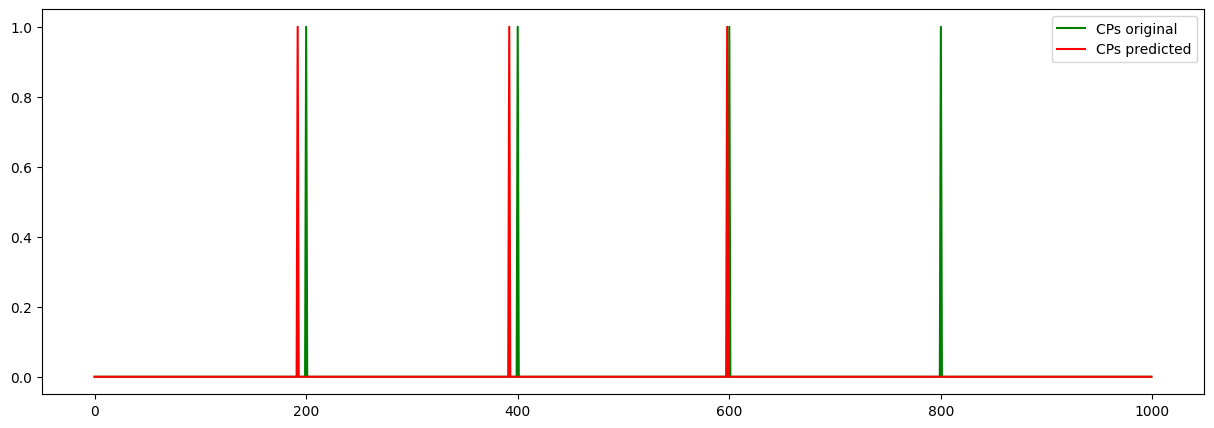

In [20]:
plt.figure(figsize=(15,5))
plt.plot(data['CPs'].values, label='CPs original', color='green')
plt.plot(cps_pred, label='CPs predicted', color='red')
plt.legend()